In [1]:
import sys
sys.path.append('..')
from utils import scroll_pages, extract_tag
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dump_path = "../subsample_chunked.xml"

In [3]:
chunks_info = []
with open(dump_path, "r") as f:
    for page in scroll_pages(f):
        page = extract_tag(page, tag="page", add_tag=False)
        page = json.loads(page)
        for chunk in page:
            chunks_info.append({"length": len(chunk["text"]), "titles": chunk["titles"]})

In [4]:
chunk_lenghts = [chunk["length"] for chunk in chunks_info]
chunk_lenghts = np.array(chunk_lenghts)

In [5]:
# compute stats on chunk lengths
print("mean chunk length:", np.mean(chunk_lenghts))
print("std chunk length:", np.std(chunk_lenghts))
print("max chunk length:", np.max(chunk_lenghts))
print("min chunk length:", np.min(chunk_lenghts))
print("median chunk length:", np.median(chunk_lenghts))


mean chunk length: 882.9176324438668
std chunk length: 1051.0897013351394
max chunk length: 148444
min chunk length: 51
median chunk length: 552.0


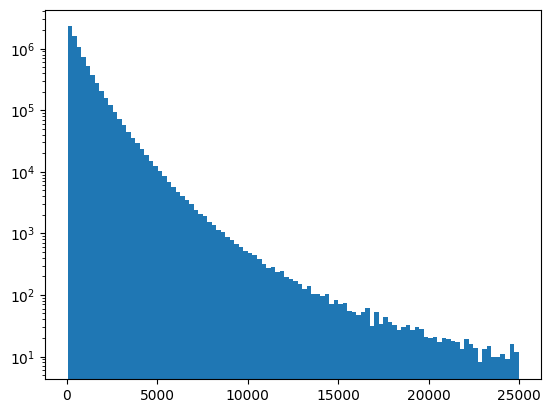

In [6]:
plt.hist(chunk_lenghts[chunk_lenghts < 25000], bins=100)
plt.yscale('log')

In [7]:
print("Number of chunks with more than 25000 characters:", len(chunk_lenghts[chunk_lenghts > 25000]))

Number of chunks with more than 25000 characters: 356


(array([152818., 159396., 185208., 180004., 199330., 197462., 206610.,
        185222., 185329., 169320., 172120., 158379., 161304., 147860.,
        150657., 138703., 140782., 129244., 131450., 121102., 122510.,
        112519., 114710., 105606., 102065., 104091.,  95541.,  97201.,
         89335.,  91028.,  84011.,  85987.,  79131.,  80713.,  74060.,
         75741.,  69992.,  72067.,  65290.,  67419.,  62050.,  64284.,
         59065.,  59997.,  56161.,  57122.,  52676.,  54220.,  50102.,
         48750.,  50010.,  46156.,  47351.,  43689.,  44759.,  41429.,
         42897.,  39167.,  40538.,  37171.,  38355.,  35582.,  36191.,
         33481.,  34710.,  31929.,  33007.,  30720.,  31453.,  29101.,
         29825.,  27570.,  28395.,  26291.,  25845.,  26911.,  24844.,
         25543.,  23607.,  24021.,  22139.,  23026.,  21481.,  21810.,
         20527.,  21141.,  19621.,  20318.,  18802.,  18999.,  17845.,
         18453.,  17308.,  17500.,  16289.,  16767.,  15618.,  15904.,
      

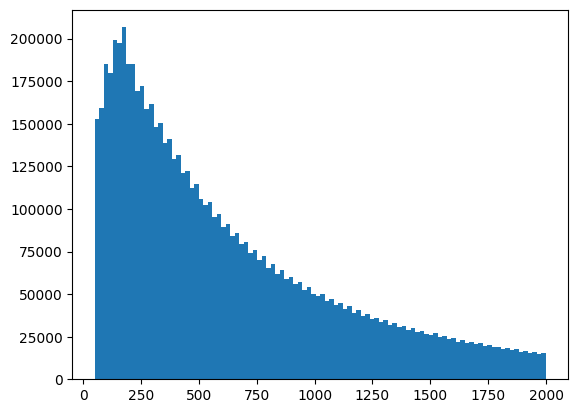

In [10]:
plt.hist(chunk_lenghts[chunk_lenghts < 2000], bins=100)